## Import modules

In [16]:

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
sns.set_style("whitegrid")

design possible outcomes for random variables
assign probabilities
define relationships between random variables


In [10]:
# Create our monte carlo simulation class
class MC_Simulator():
    
    def __init__(self,n_rep):
        """
        n_rep: number of MC replications
        """
        self.n_rep = n_rep
    def simulate_data(self, a, b,n,sigma):
        """
        a: intercept
        b: slope
        n: sample size
        sigma: error variance
        Y = a+b*X+e
        """
        X = np.random.uniform(0,1,n)
        e = np.random.normal(0,10,n)
        Y = a+b*np.log(1+X)+e
        
        return (Y,X)
    
    def estimate_ols_params(self,Y,X):
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        
        return res.params
    
    def run_mc_simulation(self,a,b,n,sigma):
        
        a_estimates = []
        b_estimates = []
        for rep in range(self.n_rep):
            Y,X = self.simulate_data(a,b,n,sigma)
            a_hat,b_hat = self.estimate_ols_params(Y,X)
            a_estimates = a_estimates + [a_hat]
            b_estimates = b_estimates + [b_hat]
        return a_estimates, b_estimates
    
    def summarize_mc_simulation(self,a,b,n,sigma):
        a_estimates, b_estimates = self.run_mc_simulation(a,b,n,sigma)
        print(f'Mean intercept intercept={np.mean(a_estimates):.3f} \n')
        print(f'Mean intercept slope={np.mean(b_estimates):.3f} \n')
        
    def plot_parameter_estimates(self,a,b,n,sigma,alpha):
        a_estimates, b_estimates = self.run_mc_simulation(a,b,n,sigma)
        
        fig = plt.figure()
        plt.hist(a_estimates, label = 'intercept', alpha = alpha)
        plt.hist(b_estimates, label = 'slope', alpha = alpha)
        plt.legend()

### Task 1 Simulate Data Generating Process (DGP) where outcome of interest depends on treatment and some observed covariates

In [5]:
avg = 1200
std = .25
numreps = 50
numsimu = 100
treament = numpy.random.normal(63, .23, numreps)

amount =numpy.random.normal(63, .23, numreps)
months = numpy.random.normal(6, .45, numreps)
rate = numpy.random.normal(avg, std, numreps).round(2) # ensure to round to 2dp


In [6]:
#our distribution formula
def interest(treatment, amount, months, rate):
	i = amount * months *rate + (treatment*amount+months)/(amount*months)
	return i

def simulate(rate,amount):
	# create an interest amount based on the monte carlo rate and amount
	simu =[]
	for x in range(len(amount)):
		simu.append(rate * amount)
	return simu


def simulateNoControl(amount,rate=0.12):
	#create an interest based on the amount and rate fixed
	simu =[]
	for x in range(len(amount)):
		simu.append(rate * amount)
	return simu

In [7]:
print(simulate(rate, amount))
print("No control")
print(simulateNoControl(amount))

[array([75428.24366521, 75520.6437559 , 76045.73450942, 76066.51104636,
       75818.72675352, 75496.49261742, 75605.32117975, 75249.02973409,
       75953.58743609, 75607.51874508, 75892.86257162, 75863.77638782,
       75692.96588947, 75579.94614376, 75893.08328961, 75702.62096725,
       75767.86584776, 75507.86812662, 76457.91021762, 75396.84838462,
       75542.25876717, 75886.11286355, 75757.23359531, 75061.92572554,
       75770.54964697, 75861.87468913, 75743.44483197, 76044.70881957,
       76002.86252456, 75632.16543453, 76017.74596229, 75388.95996518,
       75734.71339611, 75185.59133065, 75332.76058723, 75532.4059698 ,
       75382.83818606, 75426.92095389, 75644.19940017, 75164.29417608,
       76015.80308298, 75866.71502087, 75156.89328707, 75796.71589183,
       75592.91778932, 75406.01485664, 75957.4635208 , 75234.3862902 ,
       75177.77495919, 74986.45929714]), array([75428.24366521, 75520.6437559 , 76045.73450942, 76066.51104636,
       75818.72675352, 75496.492617

## Question 2
### Part a
You fail to control the confounder

In [8]:
def simulate2a(n, p, t, r):
	simu = []
	for x in range(n):
		amount = p*r*t
		simu.append(amount)
	return simu



### Part b


In [9]:
def simulate2b(t=36, r=1000):
	simu = []
	avg= 2000
	std = .46
	numreps = 100
	numsimu = 1000
	
	rate = numpy.random.normal(avg, std, numreps, numsimu).round(2)
	principal = numpy.random.normal(15000, .54, 100, 1000).round(2)
	for x in range(n):
		amount = principal[x]*rate[x]*t
		simu.append(amount)
	return simu


## Question 3

(array([ 13.,   0.,  39.,  91., 260., 221., 351., 169., 117.,  39.]),
 array([-12.42087961, -10.17171608,  -7.92255255,  -5.67338902,
         -3.42422549,  -1.17506196,   1.07410158,   3.32326511,
          5.57242864,   7.82159217,  10.0707557 ]),
 <BarContainer object of 10 artists>)

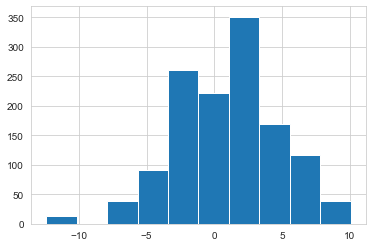

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
a = .5
b = 1.2
n = 100

slope_estimates = []
# sample size
for mc_replication in range(100):
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*np.log(1+X)+e
    mod = sm.OLS(Y,sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]] * 13 # 13 is the treatment variable
    
np.mean(slope_estimates)
plt.hist(slope_estimates)

## Part B You do not control the variable between course and effect


In [25]:
mcSim.summarize_mc_simulation(1,2,10,0.1)

Mean intercept intercept=0.914 

Mean intercept slope=1.582 



(array([ 44.,  65., 149., 134., 146., 237., 121.,  73.,  73.,  32.]),
 array([-6.78371058, -5.22782969, -3.6719488 , -2.11606792, -0.56018703,
         0.99569385,  2.55157474,  4.10745563,  5.66333651,  7.2192174 ,
         8.77509828]),
 <BarContainer object of 10 artists>)

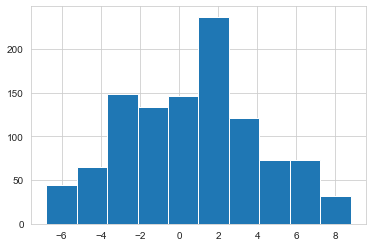

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
a = .5
b = 1.2
n = 100

slope_estimates = []
# sample size
for mc_replication in range(100):
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*np.log(1+X)+e
    mod = sm.OLS(Y,sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]] * random.randint(2, 18)
    
np.mean(slope_estimates)
plt.hist(slope_estimates)